# Conditioning and Stability Exercise

### Suleyman Gozen
 
 I thank Yung-Hsu Tsui for his valuable comments.

In [3]:
'Problem 1'

import numpy as np
from numpy import linalg as LA
import scipy.linalg as la

import matplotlib.pyplot as plt
import sympy as sy
import random

In [4]:
def cond_n(A):
    U,sigma,Vh = LA.svd(A)
    if np.min(sigma) == 0:
        return np.inf
    else:
        return np.max(sigma) / np.min(sigma)

In [5]:
A =np.array([[1,2],[3,4]])
cond_number = cond_n(A)
cond_number_pack=LA.cond(A)
print('The difference is : ', cond_number-cond_number_pack)

The difference is :  0.0


In [6]:
'Problem 2'

w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.

x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

# Perturb one of the coefficients very slightly.

h = np.zeros(21)
h[1]=1e-7
new_coeffs = w_coeffs - h
print(new_coeffs[:6])

# Use NumPy to compute the roots of the perturbed polynomial.
new_roots = np.roots(np.poly1d(new_coeffs))

# Sort the roots to ensure that they are in the same order.
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

# Estimate the absolute condition number in the infinity norm.
k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
print(k)

# Estimate the relative condition number in the infinity norm.
k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)

[1 -210 20615 -1256850 53327946 -1672280820]
[1 -210.000000100000 20615 -1256850 53327946 -1672280820]
28262391.3304


1.95063629993970e+25

In [7]:
def Problem2(n):
    
    w_roots = np.arange(1, n)
    
    x, i = sy.symbols('x i')
    
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, n-1)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    plt.figure(figsize=(9, 6))
    plt.plot(w_roots, np.zeros(n-1), '*', label='Original Solutions')
    
    h = np.zeros(n)+(1e-10) 
    
    for i in range(0,50):
        r = np.random.normal(size=n, loc=1,scale=(1e-10))

        new_coeffs = w_coeffs * r
        new_roots = np.roots(np.poly1d(new_coeffs))

        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)

        plt.scatter(new_roots.real, new_roots.imag, marker='.', c='r')
      
        k = LA.norm(new_roots - w_roots, np.inf) / LA.norm(h, np.inf)
        
        cond_n = k* LA.norm(w_coeffs,np.inf) / LA.norm(w_roots,np.inf)
        
    return cond_n

In [8]:
Problem2(20)

1.47455758652348e+27

In [9]:
'Problem 3'

def eigen_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    
    lamda = LA.eigvals(A)
    lamda1 = LA.eigvals(H+A)
    cond_abs = LA.norm(lamda-lamda1)/LA.norm(H)
    cond_rela = (LA.norm(A)/LA.norm(lamda)) * cond_abs
    
    return cond_abs,cond_rela

In [10]:
eigen_cond(A)

(0.94149256185759811, 0.95758761768914324)

In [11]:
'Problem 4'

def cond_plot(xmin, xmax, ymin, ymax, res):
    
    grid_x = np.linspace(xmin, xmax, res)
    grid_y = np.linspace(ymin, ymax, res)
    
    cond_rela = np.empty((res, res))
    
    x, y = np.meshgrid(grid_x, grid_y)
    
    for i, xi in enumerate(grid_x):
        for j, yi in enumerate(grid_y):
            A = np.array([[1,  xi], [yi, 1]])
            cond_rela[i, j] = eigen_cond(A)[1]
                                
    plt.pcolormesh(x, y, cond_rela, cmap='gray_r')
    plt.colorbar()
    
    plt.show()


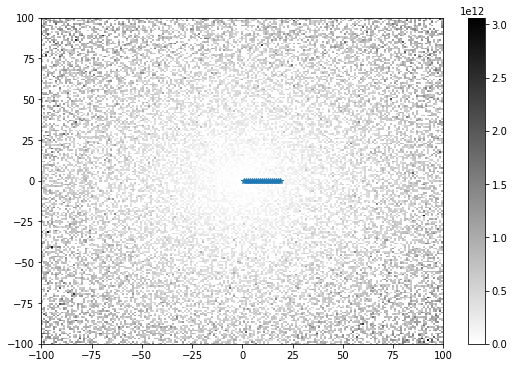

In [11]:
cond_plot(-100, 100, -100, 100, 200)

In [12]:
'Problem 5'

def Least_SQ_stab(n):
    
    xk,yk = np.load('stability_data.npy').T
    A = np.vander(xk,n+1)
    
    x_hat = la.inv(A.T @ A) @ A.T @ yk
    inv_error = LA.norm(A @ x_hat - yk)
    
    Q1, R1 = la.qr(A,mode='economic')
    x_hat_qr = la.solve_triangular(R1,Q1.T@yk)
    qr_error = LA.norm(A@x_hat_qr - yk)
    
    plt.figure(figsize=(11, 6))
    plt.plot(xk, np.polyval(x_hat, xk), label='Inversing Normal equations')
    plt.plot(xk, np.polyval(x_hat_qr, xk), label='QR')
    plt.plot(xk, yk, '.')
    plt.legend()
    plt.show()

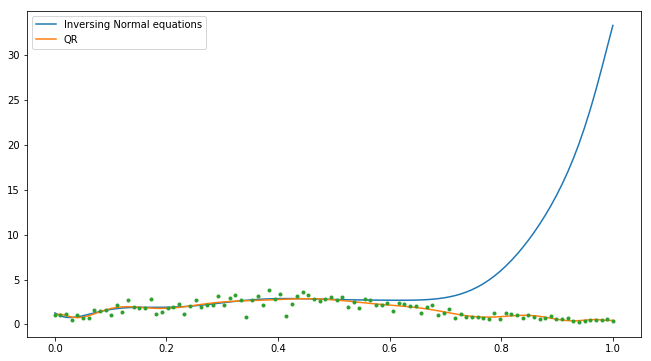

In [13]:
Least_SQ_stab(16)

In [13]:
'Problem 6'

from mpmath import e
def error_integration():
    
    x = sy.symbols('x')
    n = np.arange(5, 50, 5)
    
    errors = np.zeros((10,1))
    
    for i, n in enumerate(n):
        integral = (sy.integrate(x**n * sy.exp(x-1), (x, 0, 1)))
        In = (-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n) / e
        errors[i] = np.abs(integral - In)
        
    plt.plot(np.log(errors))
    plt.show()
    return errors

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


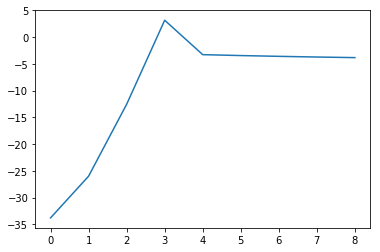

array([[  2.06126324e-15],
       [  5.03443411e-12],
       [  3.45521445e-06],
       [  2.30455449e+01],
       [  3.70862144e-02],
       [  3.12796739e-02],
       [  2.70462894e-02],
       [  2.38227287e-02],
       [  2.12860391e-02],
       [  0.00000000e+00]])

In [15]:
error_integration()